# J Spectro

 Notebook Structure (Outline)
00_data_acquisition.ipynb
Connect to Spotify API + enrich dataset

Connect to Instagram Graph API to collect post data

Save cleaned data to .csv or .pkl

01_eda_instagram.ipynb
Distribution of likes, comments, post types

Engagement vs hashtags, image filters, posting time

Correlation matrix

Heatmaps, violin plots

02_eda_spotify.ipynb
Top genres, artist diversity, average track duration

Relationship between genre and demographics

Sentiment of lyrics (optional)

Dimensionality reduction (PCA)

03_modeling_users.ipynb
Clustering users (KMeans, DBSCAN)

Predicting user traits (classification/regression)

Feature importance (Random Forests, SHAP)

04_report.ipynb
Summary visualizations

Target demographic personas

Strategic recommendations

# Facebook Access Token: 

EABFEHypyWkgBOZCo79dilIZBllYzXQKf2X4WV37mw7ukqYYa5qB52s7eOdLx2lIBLJVIZC7VbQzsWLJZBvFWVE8TAbTy22kCqxtoubkyZBJvtoSBZCZATZAIAXzkFpid76J7B5bFxp7uxuh5sQdoMIlcA9WrUdaKUzIivLRbssKHTM1EMLHK8BeNHYAm2phZA61YZCentMluZCn3ssjpqiWRHvYO0VSTQC7iXlBmzO45iYcg48o8EugY7M0h78UoTBkNmqZClpAqvYMSFiUZD

# Spotify Client ID: 

5931c7f002054143a9ceabed82f60a73

# Spotify Client Secret: 

847468078ea1432da99b955c80b3a8d3

 # Research Questions (RQs)

Research Question Platform Approach

1	What patterns exist in Instagram post features that lead to high engagement?

	Instagram	EDA + regression/classification

2	How do Spotify playlist/song attributes align with demographic or personality traits?	

Spotify	EDA + clustering + predictive modeling

3	Can we cluster users from both platforms to identify target market segments?

	Both	Merge insights + PCA/t-SNE + clustering


In [1]:
pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 49.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-war

In [2]:
pip install NLTK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 31.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install PCA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 56.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install TSNE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 15.0 MB/s eta 0:00:00
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [61 lines of output]
      Ignoring numpy: markers 'python_version < "3.7"' don't match your environment
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.1 MB ? eta -:--:--
           ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.4 MB/s eta 0:00:00
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'error'
        error: subprocess-exited-with-error
      
        × Preparing metadata (pyproject.toml) did not

In [7]:
pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 22.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 49.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-

In [1]:
import pandas as pd
import json

# Load data
df_tracks = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')
df_artists = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/artists.csv')

with open('/workspaces/Hit_Song_Prediction_Model/dict_artists.json', 'r') as f:
    dict_artists = json.load(f)

In [6]:
print(df.columns.tolist())

['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [5]:
df_clean = df_clean.sample(n=568000, random_state=42)

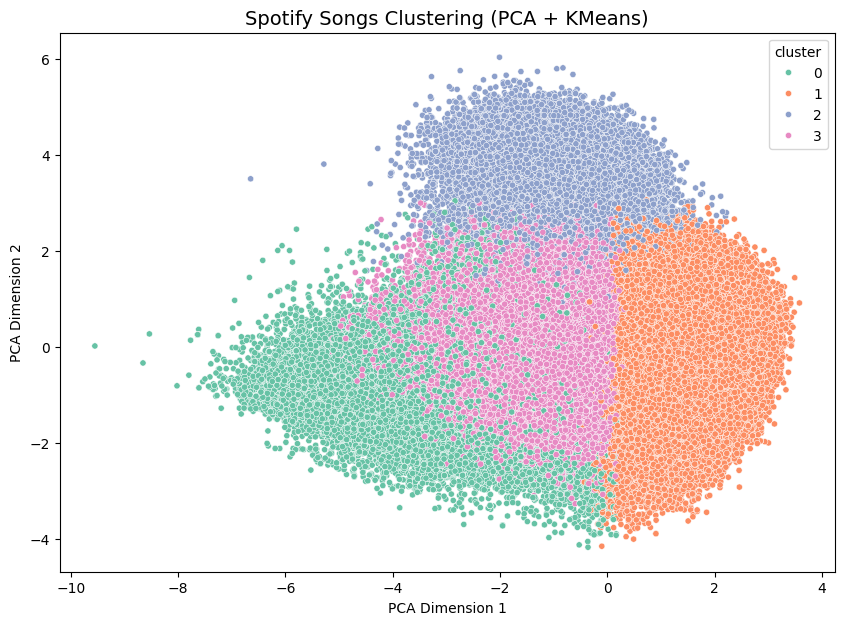

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv')

# Features to use
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 
    'valence', 'tempo'
]

# Drop rows with missing data in those columns
df_clean = df[features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# PCA (faster than t-SNE)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add PCA and cluster results to main DataFrame
df_vis = df.loc[df_clean.index].copy()
df_vis['pca-1'] = X_pca[:, 0]
df_vis['pca-2'] = X_pca[:, 1]
df_vis['cluster'] = clusters

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_vis, x='pca-1', y='pca-2', hue='cluster', palette='Set2', s=20)
plt.title('Spotify Songs Clustering (PCA + KMeans)', fontsize=14)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


In [21]:
# Describe average characteristics of each cluster
cluster_summary = df_vis.groupby('cluster')[features].mean().round(3)
print(cluster_summary)


         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0               0.425   0.281   -16.897        0.058         0.802   
1               0.619   0.722    -7.334        0.080         0.215   
2               0.664   0.403   -15.332        0.851         0.634   
3               0.498   0.339   -12.302        0.055         0.711   

         instrumentalness  liveness  valence    tempo  
cluster                                                
0                   0.801     0.185    0.387  108.709  
1                   0.057     0.214    0.652  124.990  
2                   0.005     0.389    0.564  102.381  
3                   0.022     0.198    0.433  112.737  


/tmp/ipykernel_4108/1263855087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vis, x='cluster', y='valence', palette='Set2')


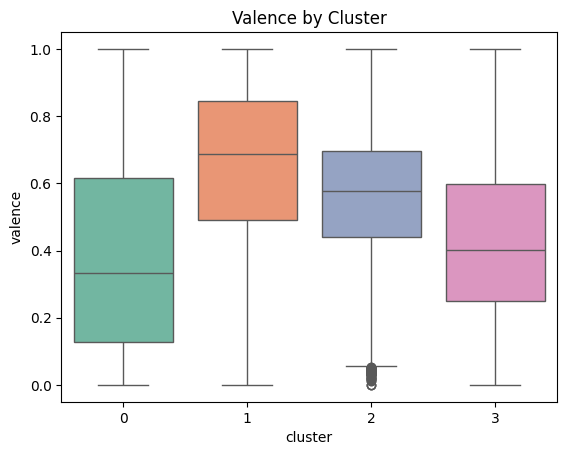

In [8]:
# Plot valence distribution per cluster
sns.boxplot(data=df_vis, x='cluster', y='valence', palette='Set2')
plt.title('Valence by Cluster')
plt.show()

In [9]:
# Extract first artist from id_artists column (assuming the column contains actual lists)
df_vis['main_artist_id'] = df_vis['id_artists'].apply(lambda x: x[0] if isinstance(x, list) else None)

# Merge with artists to get artist names
df_merged = df_vis.merge(df_artists, left_on='main_artist_id', right_on='id', how='left')


In [10]:
df_merged = df_merged.rename(columns={'name': 'artist_name'})

In [11]:
# Inspect the first few rows of the merged dataframe
df_merged.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,time_signature,pca-1,pca-2,cluster,main_artist_id,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,3,-1.929926,0.686922,0,None,NaN,NaN,NaN,NaN,NaN
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,-1.894876,4.389878,2,None,NaN,NaN,NaN,NaN,NaN
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,5,-2.673761,0.198141,3,None,NaN,NaN,NaN,NaN,NaN
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,3,-4.403877,-1.143507,0,None,NaN,NaN,NaN,NaN,NaN
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,4,-2.950273,-0.197841,3,None,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check column names of the merged dataframe
df_merged.columns


Index(['id_x', 'name_x', 'popularity_x', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'pca-1', 'pca-2',
       'cluster', 'main_artist_id', 'id_y', 'followers', 'genres', 'name_y',
       'popularity_y'],
      dtype='object')

In [13]:
# Drop rows with missing artist names in the 'name_x' column (or 'name_y' if needed)
df_merged = df_merged.dropna(subset=['name_x'])

In [14]:
import pandas as pd

# Load the artists.csv file
df_artists = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/artists.csv')

# Print column names
print(df_artists.columns.tolist())

['id', 'followers', 'genres', 'name', 'popularity']


In [17]:
pip install shap

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/__main__.py", line 22, in <module>
    from pip._internal.cli.main import main as _main
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.metadata import get_default_environmen

In [15]:
import os
print(os.listdir())  # This will list all files in the current directory

['.vscode', 'Hit_Song_Prediction_Model.docx', 'dict_artists.json', '.git', 'merged_data.csv', 'artists.csv', 'tracks.csv', 'jkjn.ipynb']


In [19]:
pip install DBSCAN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 46.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 56.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install standardscaler

  Using cached standardscaler-0.5-py3-none-any.whl
  Using cached scikit_elm-0.21a0-py3-none-any.whl.metadata (2.8 kB)
  Using cached dask-2025.3.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached partd-1.4.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached dask-2025.3.0-py3-none-any.whl (1.4 MB)
Using cached scikit_elm-0.21a0-py3-none-any.whl (30 kB)
Using cached partd-1.4.2-py3-none-any.whl (18 kB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Using cached locket-1.0.0-py2.py3-none-any.whl (4.4 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install classification_report

  Using cached classification_report-1.0.0.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment var

In [9]:
pip install mean_squared_error

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, mean_squared_error
import shap

# Load the merged dataset with user features (modify path as needed)
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/merged_data.csv')

# Preprocess data (handle missing values, scale features)
df_clean = df.dropna()  # Optional: Drop rows with missing values, or impute if needed

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[['feature_1', 'feature_2', 'feature_3', 'feature_4']])  # Modify feature names

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose the number of clusters
df_clean['kmeans_cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering with silhouette score
sil_score = silhouette_score(scaled_features, df_clean['kmeans_cluster'])
print(f"Silhouette Score (KMeans): {sil_score}")

# DBSCAN Clustering (alternative to KMeans)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Visualize clusters with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df_clean['pca_1'], df_clean['pca_2'] = pca_components[:, 0], pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='kmeans_cluster', data=df_clean, palette='viridis')
plt.title('KMeans Clustering (PCA)')
plt.show()

# Train a classification model to predict user traits (e.g., demographic)
X = df_clean[['feature_1', 'feature_2', 'feature_3', 'feature_4']]  # Features to predict from
y = df_clean['user_trait']  # Modify according to your target trait (e.g., demographic)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier (modify if regression is needed)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Feature importance (Random Forest)
feature_importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

# SHAP values for model interpretation
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Optional: If regression is used
# reg = RandomForestRegressor(random_state=42)
# reg.fit(X_train, y_train)
# y_reg_pred = reg.predict(X_test)
# print(f'Mean Squared Error: {mean_squared_error(y_test, y_reg_pred)}')



/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyError: "None of [Index(['feature_1', 'feature_2', 'feature_3', 'feature_4'], dtype='object')] are in the [columns]"

In [17]:
print(df['popularity_x'].unique())  # Example to check unique values in this column


[]


In [18]:
df.groupby('cluster').mean()[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

KeyError: 'cluster'

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df['pca-1'], df['pca-2'], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Scatter Plot by Cluster')
plt.colorbar(label='Cluster')
plt.show()


KeyError: 'pca-1'

In [22]:
correlation_matrix = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
print(correlation_matrix)


                  danceability  energy  loudness  speechiness  acousticness  \
danceability               NaN     NaN       NaN          NaN           NaN   
energy                     NaN     NaN       NaN          NaN           NaN   
loudness                   NaN     NaN       NaN          NaN           NaN   
speechiness                NaN     NaN       NaN          NaN           NaN   
acousticness               NaN     NaN       NaN          NaN           NaN   
instrumentalness           NaN     NaN       NaN          NaN           NaN   
liveness                   NaN     NaN       NaN          NaN           NaN   
valence                    NaN     NaN       NaN          NaN           NaN   
tempo                      NaN     NaN       NaN          NaN           NaN   

                  instrumentalness  liveness  valence  tempo  
danceability                   NaN       NaN      NaN    NaN  
energy                         NaN       NaN      NaN    NaN  
loudness            

In [24]:
df = pd.read_csv("/workspaces/Hit_Song_Prediction_Model/tracks.csv", parse_dates=['release_date'])  # if a time column exists
print(df.dtypes)
print(df.head())
print(df.describe())

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e           

In [ ]:
sm.graphics.tsa.plot_acf(df['popularity'].dropna(), lags=50)
plt.title("Autocorrelation of Popularity")
plt.show()


In [42]:
import pandas as pd

# Load the dataset and parse the date column
df = pd.read_csv('/workspaces/Hit_Song_Prediction_Model/tracks.csv', parse_dates=['release_date'])

# Confirm the data type
print(df.dtypes['release_date'])

# Display first 5 rows
print(df[['release_date']].head())


object
  release_date
0   1922-02-22
1   1922-06-01
2   1922-03-21
3   1922-03-21
4         1922


In [43]:
# Re-parse with error handling
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Drop rows where release_date couldn't be parsed
df = df.dropna(subset=['release_date'])

# Confirm it worked
print(df.dtypes['release_date'])  # Should now show datetime64[ns]
print(df['release_date'].head())


datetime64[ns]
0   1922-02-22
1   1922-06-01
2   1922-03-21
3   1922-03-21
9   1922-03-29
Name: release_date, dtype: datetime64[ns]


/tmp/ipykernel_4108/3763333303.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['popularity'].resample('M').mean()


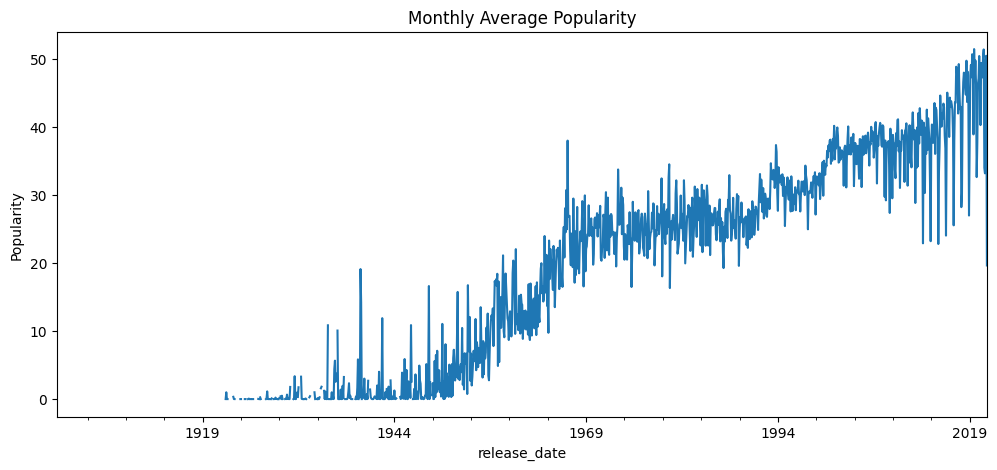

In [44]:
# Set datetime column as index
df = df.set_index('release_date').sort_index()

# Resample monthly and compute mean popularity
monthly_data = df['popularity'].resample('M').mean()

# Plot it
import matplotlib.pyplot as plt
monthly_data.plot(title='Monthly Average Popularity', figsize=(12, 5))
plt.ylabel('Popularity')
plt.show()

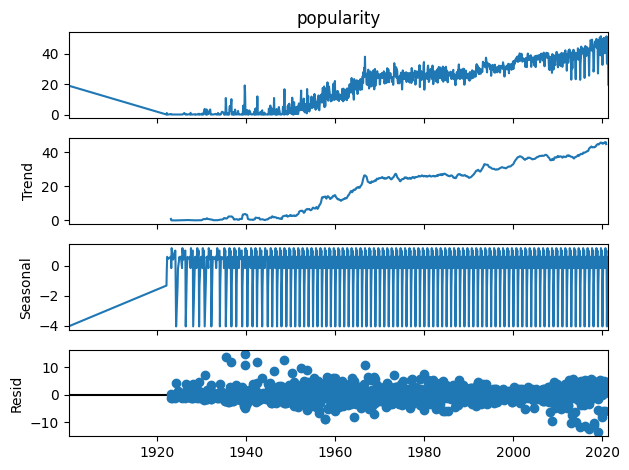

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Drop missing values
monthly_data = monthly_data.dropna()

# Decompose the time series with a 12-month seasonality
decomposition = seasonal_decompose(monthly_data, model='additive', period=12)

# Plot
decomposition.plot()
plt.tight_layout()
plt.show()

In [46]:
# Set the frequency for DatetimeIndex
monthly_data.index = monthly_data.index.to_period('M').to_timestamp()